<a href="https://colab.research.google.com/github/pietroventurini/machine-learning-notes/blob/main/2.1%20-%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Contents

1. **[Introduction](#Introduction)** (⚠️ I have to translate it to english)
    1. Types of data  
    2. Data structures  
    3. Data quality  
    4. Data similarity measures
2. [**Data preprocessing**](#Data-preprocessing)  
    1. [Feature scaling](#Feature-scaling)  
    2. [Encoding categorical features](#Encoding-categorical-features)  
    3. [Curse of dimensionality](#Curse-of-dimensionality)  
    4. [Dealing with outliers](#Dealing-with-outliers)  
    5. [Ranking](#Ranking)  
    6. [Non-linear transformations](#Non-linear-transformations)
3. [**Feature engineering**](#Feature-engineering)  
    1. [Numeric features](#Numeric-features)  
    2. [Categorical features](#Categorical-features)  
    3. [Mean encoding](#Mean-encoding)
    4. [Missing values](#Missing-values)  
    5. [Feature extraction from text and images](#Feature-extraction-from-text-and-images)  
    6. [Statistics and distance based features](#Statistics-and-distance-based-features)  
    7. [Interaction features](#Interaction-features) 
4. [**Data leakages**](#Data-leakages)  
    1. [Data leaks in time series](#Data-leaks-in-time-series)  
    2. [Unexpected information](#Unexpected-information)  
    3. [Leaderboard probing](#Leaderboard-probing)  
    4. [Example: Expedia Kaggle competition](#Example:-Expedia-Kaggle-competition)  

<a name='Introduction'></a>
# Introduction 

Most of the topics covered in this notebook are inspired by the Coursera course ["How to win a data science competition"](https://www.coursera.org/learn/competitive-data-science).

Appunti: finire di tradurre in inglese ⚠️.

Attributi possono essere qualitativi/quantitativi. Per attributi quantitativi va tenuta in considerazione l'unità di misura (si pensi ad una variabile altezza presente in due copie di un dataset: una in Europa, misurata in *cm* e l'altra in America ma convertita in *feet*. Questo fattore va tenuto in conto, ad esempio nel momento in cui decida di addestrare il mio algoritmo su un dataset Europeo, e successivamente testi il mio algoritmo con dati aventi unità di misura differente.

## Proprietà fondamentali
Attributi possono essere distinti in:
- **Nominali:** ID, colore, zip codes...
- **Ordinali:** il loro valore è una categoria ordinata e la distanza tra le categorie non è nota, per esempio altezza (basso, medio, alto), ranking (da 1 a 10).
- **Interval:** attributi su cui ha senso calcolare delle differenze (es: temperatura, data...)
- **Ratio:** attributi su cui ha senso fare dei rapporti dei loro valori (es: temperatura in Kelvin perché non include lo zero, lunghezza, tempo...)

Questa classificazione è sostanzialmente basata sul tipo di operazioni che posso fare sugli attributi:
- Uguaglianza: $=, \neq$
- Confronto ordinale: $<, \le, >, \ge$
- Addizione: $+,-$
- Moltiplicazione: $\times, \div$ 

Le **operazioni** effettuabili sui miei dati determineranno le tecniche di machine learning e data mining utilizzabili. Alcuni esempi di operazioni effettuabili:
- Nominali: moda, entropia, test di correlazione $\chi^2$...
- Ordinali: mediana, calcolo di percentili, correlazione dei ranghi, test dei segni...
- Interval: media, deviazione standard, coefficiente di Pearson, t test, F test...
- Ratio: media geometrica, media armonica, variazione percentuale...

Le **trasformazioni** effettuabili sui miei dati:
- Nominali: permutazioni dei valori (se gli ID dei miei dipendenti venissero riassegnati farebbe qualche differenza?)
- Ordinali: qualsiasi cambio dei valori che mantenga l'ordinamento (quindi $value_{new} = f(value_{old}$ tale che $f$ sia monotona)
- Interval: qualsiasi operazione che mantenga la proporzione tra i vari intervalli (una funzione affine ad esempio)
- Ratio: qualsiasi operazione che mantenga il rapporto dei vari valori (come una moltiplicazione per una costante)

## Attributi discreti e continui
Discreti possono assumere un insieme finito di valori, Continui possono assumere un insieme infinito di valori (tenere comunque a mente che la rappresentazione e memorizzazione su un calcolatore comporterà una discretizzazione di questi).

## Tipologie di strutture dati
Il dati possono essere memorizzati secondo diverse tipologie di struture che determineranno gli algoritmi di apprendimento applicabili
- Un insieme di **record**: 
    - dati matriciali: ciascun record è costituito da un insieme fisso di attributi
    - testuali: ad esempio gli attributi possono essere delle parole e i record possono corrispondere a documenti. In ciascuna cella avrò il numero di occorrenze di quella parola per quel particolare documento.
    - transizioni di stato
- Un **grafo**: WWW, strutture molecolari...
- Dati **ordinati**: dati spaziali, temporali, sequenze...

## Qualità dei dati
Le misure sono tipicamente affette da rumore, quindi questo fattore è da tenere presente. Prima di fare una qualunque analisi del nostro sistema è opportuno porsi delle domande: è presente del rumore nel nostro dataset? In quale misura? 

Vi sono degli *outliers* nel nostro dataset? Eventualmente potrei utilizzare la mediana piuttosto che la media, che è meno influenzata dalla presenza di outliers. In tecniche di apprendimento non supervisionato, come il clustering, la presenza di outliers può influenzare notevolmente l'accuratezza del risultato prodotto dall'algoritmo. Potrei quindi decidere di filtrare eventuali outliers.

Va tenuto conto anche di valori mancanti (è necessario capire se la loro mancanza abbia un certo significato, in modo da poter associare un valore di default evaentualmente) o duplicati. Spesso gli algoritmi di machine learning escludono i record con valori mancanti, ma questo potrebbe causare notevoli problemi qualora il numero di dati mancanti sia alto. Il motivo dell'assenza di alcuni valori può essere dovuto a:
- informazioni non raccolte: ad esempio in un questionario una persona potrebbe non voler specificare il sesso.
- informazioni non applicabili: un salario ad un bambino

In questi casi potrei cercare di dedurre il valore inferendolo da altri record simili a quello con il valore mancante oppure a partire da altri attributi dello stesso record (dall'altezza e dall'indice di massa corporea potrei inferire il peso). Posso cercare di eliminare record con troppi valori mancanti, fare una stima, ignorare tale attributo, rimpiazzarli con valori quantitativi con una probabilità associata.

Eventuali duplicati (o dati molto simili) vanno gestiti attraverso un processo di **data cleaning**.

## Similarità e Dissimilarità dei dati
La **similarità** definisce quanto due campioni siano simili; è spesso misurata nel range $[0,1]$. La **dissimilarità** indica quanto due campioni non si assomiglino. Più questa è bassa, più i campioni si assomigliano (se sono identici, la dissimilarità sarà 0). Il limite superiore può variare, ad esempio può essere utilizzata la distanza euclidea tra due punti come misura di dissimilarità.

A seconda del tipo di attributi possiamo individuare:
- **Nominali:** possiamo verificare se questi siano uguali o meno.  
    - Dissimilarità: 
$$d=\begin{cases}0 & \text{if } p=q \\ 1 & \text{if } p\neq q \end{cases}$$
    - Similarità:
$$s=\begin{cases}1 & \text{if } p=q \\ 0 & \text{if } p\neq q \end{cases}$$
- **Ordinali:** avendo un ordinamento tra questi $n$ elementi, possiamo utilizzare i loro indici ($|p-q|$ rappresenta la distanza in termini di numero di elementi tra $p$ e $q$. Se questi coincidono, allora $|p-q|=0$, se questi sono agli estremi opposti, allora $|p-q|=n-1$
    - Dissimilarità: $d = \frac{|p-q|}{n-1}$
    - Similarità:    $s = 1 - \frac{|p-q|}{n-1}$
- **Interval o Ratio:** 
    - Dissimilarità: $d = |p-q|$ (distanza euclidea, ma possono anche essercene altre)
    - Similarità:    $s = -d$, $s = \frac{1}{1+d}$ or $s = 1 - \frac{d - min_d}{max_d - min_d}$
    
Come distanza per attributi di tipo interval, possiamo utilizzare la **distanza euclidea** $d = \sqrt{\sum_{i=1}^{n}{\left(p_i - q_i \right)^2}}$, dove $n$ rappresenta il numero di features (dimensioni). In questo caso la standardizzazione risulta necessaria in modo che ciascuna feature contribuisca in ugual modo nel calcolo della distanza. È quindi possibile costruire una matrice di similarità o di dissimilarità andando a misurare le distanze tra tutti i dati, secondo i valori di loro attributi di tipo interval.

Una generalizzazione di distanza Euclidea e della distanza di Manhattan è la **distanza di Minkowski**

$$d = \left(\sum_{i=1}^{n}{|p_i - q_i |^r}\right)^{\frac{1}{r}}$$

dove $r$ è un parametro:
- $r=1$: norma $l_1$
- $r=2$: distanza Euclidea
- $r\rightarrow\infty$: norma $l_\infty$

Una distanza deve rispettare le proprietà di definizione positiva, simmetria e disuguaglianza triangolare.

Anche la similarità deve rispettare alcune proprietà: 
- $s(p,q)=1 \Leftrightarrow p=q$ (massima similarità)
- $s(p,q) = s(q,p) \; \forall q,p$ (simmetria)
di conseguenza la similarità non è una distanza.

### Similarità tra vettori binari
Per quanto riguarda la **similarità tra vettori binari** (dove $p$ e $q$ hanno solo attributi binari) possiamo definire il **Simple Matching Coefficient** e il **coefficiente di Jaccard**:

- $M_{00}$: numero di attributi dove $p=0$ e $q=0$
- $M_{01}$: numero di attributi dove $p=0$ e $q=1$
- $M_{10}$: numero di attributi dove $p=1$ e $q=0$
- $M_{11}$: numero di attributi dove $p=1$ e $q=1$

$$SMC = \frac{\text{numero di matches}}{\text{numero di attributi}} = \frac{M_{11} + M_{00}}{M_{01} +M_{10} +M_{11} +M_{00}}$$

$$J = \frac{\text{numero di } M_{11} \text{ matches}}{\text{numero di attributi non entrambi zero}} = \frac{M_{11}}{M_{01} +M_{10} +M_{11}}$$

#### Esempio
$p = 1000000000$

$q = 0000001001$
- $M_{00}$: 7
- $M_{01}$: 2
- $M_{10}$: 1
- $M_{11}$: 0

$SMC = \frac{7+0}{7+2+1+0} = 0.7$

$J = \frac{0}{2+1+0} = 0$

### Similarità del coseno
Dati due vettori $d_1,d_2$ si ha:

$$\cos(d_1,d_2) = \frac{(d_1 \bullet d_2)}{||d_1|| \cdot ||d_2||}$$

dove $\bullet$ indica il prodotto scalare e $||d||$ indica la lunghezza del vettore (norma).

#### Esempio
$d_1 = 3205000200$

$d_2 = 1000000102$

$\cos(d_1,d_2) = \frac{5}{6.481+2.245} = 0.3150$

### Misure di correlazione
Per calcolare la correlazione, prima si standardizzano $p$ e $q$, poi si calcola il prodotto scalare:

$$p'_k=\frac{\left(p_k-\mu_p\right)}{\sigma_p} \quad q'_k=\frac{\left(q_k-\mu_q\right)}{\sigma_q}$$

$$correlation(p,q) = p'\bullet q'$$

<a name='Data-preprocessing'></a>

# Data preprocessing

Prima di applicare algoritmi di machine learning potrei effettuare operazioni di preprocessing dei dati al fine di facilitare la successiva gestione di tali dati.
- **Aggregazione:** potrei cercare di aggregare tra loro più attributi o più record per ridurre il numero di dati, per effettuare cambi di scala (aggregare paesi in regioni, regioni in nazioni...) o per avere dati più stabili, con meno variazioni.
- **Campionamento (sampling):** quando ho un dataset molto grande posso fare un campionamento del dataset e applicare inizialmente le tecniche di machine learning su un dataset ridotto (analogamente per la valutazione del modello ottenuto). Tecniche di **stratified cross validation** (che mantengono le proprietà statistiche del dataset originale) sono consigliate a questo scopo. Il campionamento può essere casuale, senza reinserimento, con reinserimento, *stratified* (divido i dati in partizioni ed estraggo campioni casuali da ciascuna partizione)...
[Quanto deve essere grande il sample?](https://en.wikipedia.org/wiki/Sample_size_determination) In genere più è grande, più è alta la precisione nella stima di parametri sconosciuti. Questo fenomeno è descritto da varie leggi matematiche, tra cui la legge dei grandi numeri e il teorema del limite centrale.

- **Dimensionality reduction:** in modo da poter usare tecniche che lavorino solo sugli attributi principali
- **Feature subset selection:** cercare di identificare le feature (variabili) più rilevanti e quali invece contengano rumore
- **Feature creation:** ho una conoscenza sul dominio che potrei sfruttare per inserire nuovi attributi nel mio dataset (ad esempio da altezza e peso ricavare l'indice di massa corporea)
- **Attribute transformation:** un peso di una persona in milligrammi potrebbe essere trasformato in kilogrammi. Possono essere applicati trasformazioni lineari o non-lineari per favorire l'apprendimento (esempio: trasformazione logaritmica per passare da un modello esponenziale ad uno lineare).
- **Discretization and Binarization:** se so che gli attributi numerici sono afflitti da rumore, potrei decidere di discretizzare questi valori.

## Feature scaling

There are algorithms that are sensitive to feature scaling, meaning that varying the scale of a feature may change the behavior of the algorithm itself:
- k-nearest neighbors: if we want all features to contribute equally, we need to scale them to a common range.
- k-means
- logistic regression, SVMs, Neural networks, etc.: gradient descent can be much quicker if features are properly scaled.
- linear discriminant analysis, principal component analysis: since we want to find orthogonal directions of maximizing the variance, we want features on the same scale, in order not to emphasize certain variables more.

On the contrary, tree-based algorithms such as the CART decision tree are scale-invariant, in the sense that they aim at finding the optimal threshold to split a certain feature, regardless of the scale.

There exists many methods to perform feature scaling, such as:

- Rescaling (min-max normalization)
- Mean normalization
- Standardization
- Scaling to unit length

### Min-max normalization

It consists in rescaling the range of possible values to $[0,1]$ or $[-1,1]$.

\begin{equation}
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
\end{equation}

### Mean normalization

\begin{equation}
x' = \frac{x - \mu_x}{\max(x) - \min(x)}
\end{equation}

where $\mu_x$ being the sample mean of $x$.

### Standardization

Mean normalization makes the normalized feature to have zero mean and unit variance.

\begin{equation}
x' = \frac{x - \mu_x}{\sigma_x}
\end{equation}

where $\mu_x$ is the sample mean and $\sigma_x$ is the sample standard deviation of $x$.

### Scaling to unit length

It consists in scaling a feature vector such that the resulting one has length one.

\begin{equation}
x' = \frac{x}{\Vert x \Vert}
\end{equation}

#### Example

In the following example, we will compare how different scalers (respectively the Standard scaler and the Min-max scaler) affect the performance of logistic regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

data = load_wine(as_frame=True)
X = data.data[['alcohol','malic_acid']]
y = data.target
X.describe()

,alcohol,malic_acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

# fit logistic regression without scaling
model = LogisticRegression()
model.fit(X_train, y_train)

# compute root MSE on test set
rmse = [model.score(X_test, y_test)]

# build pipelines using standard scaler and min-max scaler
pipelines = [make_pipeline(MinMaxScaler(), LogisticRegression()),
             make_pipeline(StandardScaler(), LogisticRegression())]

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    
df_lr = pd.DataFrame({'RMSE':rmse}, index=['Original','Min-Max','Normalized'])
df_lr

,RMSE
Original,0.796296
Min-Max,0.745356
Normalized,0.680414


As we can see, by normalizing the two features, we obtained a smaller root mean squared error on the test set, compared to the score we obtained on the unscaled test set.

## Encoding categorical features

### Ordinal encoding

Categorical features can be efficiently coded as integers, by replacing the categories by an integer. For instance, consider these 3 categorical features that a person could have:
```python
Sex = ['male', 'female']
Occupation = ['student', 'worker', 'unemployed']
From = ['Europe', 'Asia', 'North-America', 'South-America', 'Africa', 'Australia', 'Antarctica']
```

We can convert each of these categories into an integer value by using [`sklearn.preprocessing.OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder):

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[['male', 'female'], 
                                 ['student', 'worker', 'unemployed'], 
                                 ['Europe', 'Asia', 'North-America', 'South-America', 'Africa', 'Australia', 'Antarctica']])
X = [['male', 'unemployed', 'North-America'], ['female', 'student', 'Africa']]
enc.fit(X)
enc.transform(X)

array([[0., 2., 2.],
       [1., 0., 4.]])

In general, such representation can't be used directly with estimators because ordinal encoding creates a fictional ordinal relationship in the data. For this reason, in order to improve the performance of the learning algorithm we will use, **one-hot encoding** is often applied to categorical variables.

### Frequency encoding

Frequency encoding consists into associating to each value a categorical feature may take, the corresponding frequency in the dataset. For instance, assume that the titanic dataset has a categorical feature called `Embarked`:

```python
encoding = titanic.groupby('Embarked').size()
encoding = encoding / len(titanic)
titanic['Embarked_enc'] = titanic.Embarked.map(encoding)
```

### One-hot encoding

One-hot encoding consists in creating, for each unique value in the original categorical column, a new column representing a binary feature that can take only two values: 1, if in the original column, that entry takes value equal to the one that this column represents, 0 otherwise.

For instance, consider an instance having `Occupation = worker`. Therefore, by one-hot encoding the categorical columns, the `Occupation` feature will give birth to 3 new columns, one for each value that `Occupation` may take.

| student | worker | unemployed |
|---------|--------|------------|
| 0       | 1      | 0          |

One-hot encoding can be performed using [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) or [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories=[['male', 'female'], 
                                ['student', 'worker', 'unemployed'], 
                                ['Europe', 'Asia', 'North-America', 'South-America', 'Africa', 'Australia', 'Antarctica']])
X = [['male', 'unemployed', 'North-America'], ['female', 'student', 'Africa']]
enc.fit(X)
enc.transform(X).toarray()

array([[1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Note that not every model requires to one-hot encode categorical features. For instance, random forests, can work directly with categorical, without requiring those features to be transformed at all. Note also that, categorical features with many values would end up in many new binary features, resulting into a very sparse matrix. In that case, we can store just the non-zero elements using **sparse matrices**, reducing the memory occupation by a lot.

## Curse of dimensionality
The curse of dimensionality is a phenomenon that arises when working in very-high dimensional spaces. As the number of dimensions increases, the space grows exponentially and data soon becomes sparse (meaning that much volume is left unoccupied by dataset's instances). Suppose, for example, that every variable (i.e. every dimension) can take only one of two values. With $n$ variables, we would have $2^n$ possible combinations of their values. When variables are more than observations we face the risk of overfitting. For example, clustering algorithms fails to operate on very large spaces, since data points (i.e. vectors of the space) tend to be equally spaced, frustrating any attempt of identifying clusters based on how close points are together.

A trivial example of clustering is: assume we have 8 candies (8 records). Each candies is characterized by two boolean attributes that describe its color: <span style="color:red">Reddish</span> and <span style="color:blue">Bluish</span>. Our dataset consists of 4 reddish candies and 4 bluish ones.

|    | Reddish   | Bluish   |
|----|-----------|----------|
| c1 | 1         | 0        |
| c2 | 1         | 0        |
| c3 | 1         | 0        |
| c4 | 1         | 0        |
| c5 | 0         | 1        |
| c6 | 0         | 1        |
| c7 | 0         | 1        |
| c8 | 0         | 1        |

It won't be difficult for a clustering algorithm to indentify two clusters. But let's think now of having 8 boolean variables that describe the candy's color more in detail.

|    | Red    | Orange  | Yellow | Fuchsia|  Blue  | Light blue | Green | Purple |
|:----:|:--------:|:---------:|:--------:|:--------:|:--------:|:---------:|:-------:|:-------:|
| c1 | 1      | 0       | 0      | 0      | 0      | 0       | 0     | 0     |
| c2 | 0      | 1       | 0      | 0      | 0      | 0       | 0     | 0     |
| c3 | 0      | 0       | 1      | 0      | 0      | 0       | 0     | 0     |
| c4 | 0      | 0       | 0      | 1      | 0      | 0       | 0     | 0     |
| c5 | 0      | 0       | 0      | 0      | 1      | 0       | 0     | 0     |
| c6 | 0      | 0       | 0      | 0      | 0      | 1       | 0     | 0     |
| c7 | 0      | 0       | 0      | 0      | 0      | 0       | 1     | 0     |
| c8 | 0      | 0       | 0      | 0      | 0      | 0       | 0     | 1     |

The clustering algorithm is not able anymore to detect similarities (correlation between variables) between subsets of candies.

It is possible to remedy by adopting techinques of ***dimensionality reduction*** like:
- **Principal Component Analysis (PCA)**:
- **Singular Value Decomposition:**
- **Feature Subset Selection:** we try to remove redundant features (e.g. the price of a product and the corresponding tax) or insignificant features (e.g. the eyes color of a client in a clustering problem about types of clients of a supermarket.

## Dealing with outliers

To protect a linear model from being affected by outliers we can *clip* features' values between within a specific range, choosing the lower bound and the upper bound as some percentiles of that features (e.g. first, and 99th percentile). This procedure is called ***winsorization*** and can be done in Python using [`scipy.stats.mstats.winsorize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html). An example is shown below:

<AxesSubplot:>

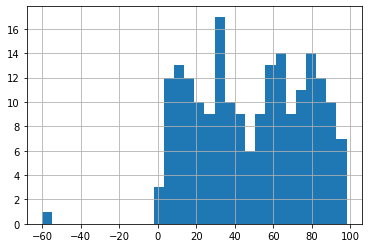

In [ ]:
# generate data within a range
x = np.random.uniform(low=0, high=100, size=(200,))

# add outlier
x = np.append(x, -60)

# plot histogram
pd.Series(x).hist(bins=30)

<AxesSubplot:>

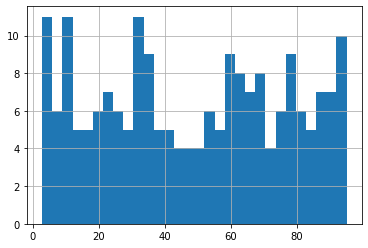

In [ ]:
# compute 99% interval, clip and plot histogram
upper_bound, lower_bound = np.percentile(x, [1,99])
x = np.clip(x, upper_bound, lower_bound)

pd.Series(x).hist(bins=30)

## Ranking

Another useful preprocessing operation is *ranking*. [Ranking](https://en.wikipedia.org/wiki/Ranking) consists into performing a weak ordering of the values a feature takes. By doing this we move outliers closer to other values, defining a mapping between values and indexes. For instance:

In [ ]:
from scipy.stats import rankdata

rankdata([10, 3, 1e-4, 50, 3])

array([4. , 2.5, 1. , 5. , 2.5])

Note that, in order to keep the same rank mapping also with the test set, we need to store the mapping computed with the training set. Alternatively, we can first concatenate the training with the test set, then compute the ranking of the ensemble.

## Non-linear transformations

Non-linear transformations of the values can help non-tree-based algorithms, such as neural nets, because they bring the values closer to their mean and make the values near zero a little more distinguishable. Examples are:
- Log transform

$$x' = \log(1+x)$$

- Rising to a power $< 1$

$$x' = \sqrt{x + 2/3}$$

<a name='Feature-engineering'></a>

# Feature engineering

## Numeric features

Numeric features can be extended by generating new ones, either with knowledge about the domain of the problem, or through *exploratory data analysis* (EDA). For example, if we had `height` and `width` features, we could generate a new `distance` variable by using Pitagora's theorem. Similarly, `squared_area` and `total_price` can be combined into an interaction features called `price_for_m2`, computing the price for square meter.

Another thing we may try, is to extract the fractional part of a decimal number. Variables such as `price` can benefit from this because factors such as people perception of prices could then be taken into account by the model.

| price | price_decimal_part |
|:-----:|:------------------:|
|  0.99 |         .99        |
|  6.49 |         .49        |
|  1.00 |         .00        |
|  9.98 |         .98        |

### Date and time features

Date and time are quite interesting features, because not only they are linear in nature, but they also have several different tiers, such as *year*, *day*, *week*... Features generated by datetime can be divided into two categories:
1. **Time moments in a period**: day number in the week, month, season, year, seconds, minutes, hours. This is useful to capture **repetitive patterns** in data. Another attribute of this type can be a boolean value indicating whether that day is a holiday.
2. **Time passed since a particular event**: this can be either 
    - **row-independent**: such as time past from a general moment for all data (e.g. from year 2000).
    - **row-dependent**: for instance, the number of days left until Christmas, or the days past since the last promotional campaign.
    
Generating features of this kind may return useful in tasks such as **churn prediction**, which consists in estimating the likelihood that a customer will churn (i.e. will stop paying for a service). Combining a feature like `last_purchase_date` with other relevant dates, into a new variable `date_diff`, can improve by a lot the model's performances.

### Coordinates features

When we deal with features involving coordinates (such as the position of a house), we can augment our dataset in many ways:
- Computing the distance from a certain relevant place, like an hospital, a school or a popular meeting place.
- Splitting the map into squares, and for every flat in each square, computing the distance from the most expensive flat in that area.
- Organizing data points into clusters, then use the centroid of each cluster as an important point from which to compute the distance.
- Computing aggregating statistics for objects' surrounding area (e.g. number of flats within a certain range, which can be interpreted as area's popularity).
- Transform coordinates by rotating them around a point.

## Categorical features

When dealing with categorical features, we can derive new ones by considering the interaction between the variables, so that the model can find optimal coefficient for interaction features and improve. This can be useful with non-tree-based models.
This can be done by concatenating the values of two or more features, and then one-hot encoding them.

Assume to have this data, where the interaction feature `sex_fav_color` between `sex` and `fav_color` has already been built.

| sex    | fav_color | sex_fav_color    |
|--------|-----------|------------------|
| male   | green     | male_green       |
| female | black     | female_black     |
| female | turquoise | female_turquoise |
| female | black     | female_black     |

By one-hot encoding the `sex_fav_color` variable, we obtain:

| female_black | female_turquoise | male_green |
|--------------|------------------|------------|
| 0            | 0                | 1          |
| 1            | 0                | 0          |
| 0            | 1                | 0          |
| 1            | 0                | 0          |

## Mean encoding

Mean encoding (or likelihood/target encoding) is a powerful technique that allows to create new features from the target variable. The simplest way to achieve mean encoding is to encode each value of a categorical variable with the corresponding target mean.

In [ ]:
from sklearn.preprocessing import LabelEncoder

dataset = [('Milan', 0),('Milan', 1),('Milan', 1),('Milan', 0),('Milan', 0),('Rome', 1),
           ('Rome', 1),('Rome', 1),('Rome', 0),('Venice', 0),('Venice', 0),('Rome', 1)]
df = pd.DataFrame(dataset, columns=['feature','target'])

# perform label encoding of feature
enc = LabelEncoder()
enc.fit(df.feature)
df['feature_label'] = enc.transform(df['feature'])

# computing feature mean
means = df.groupby('feature').target.mean()
df['feature_mean'] = df['feature'].map(means)

# reorder columns and show dataframe
df = df[['feature', 'feature_label', 'feature_mean', 'target']]
df

,feature,feature_label,feature_mean,target
0,Milan,0,0.4,0
1,Milan,0,0.4,1
2,Milan,0,0.4,1
3,Milan,0,0.4,0
4,Milan,0,0.4,0
5,Rome,1,0.8,1
6,Rome,1,0.8,1
7,Rome,1,0.8,1
8,Rome,1,0.8,0
9,Venice,2,0.0,0


Now, by plotting the histograms of a certain label encoded and mean encoded feature, we can observe that, with label encoding, the plot doesn't convey any information about the target value, since the label associated to each feature's value is not correlated with the target variable. On the contrary, by looking at the histogram of the target mean encoded feature, the classes look way more separable.

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/data_analysis/mean_vs_label_encoding.png?raw=1" alt="comparison of label encoding and mean encoding histograms" style="display: block; margin-left: auto; margin-right: auto; width:50em" />

In decision trees, with mean encoding we can reach a better loss than we can with label encoding, still keeping the tree short.

### Remarks

The presence of categorical variables with a lot of values is usually an indicator that mean encoding may help the model.

The target variable can be used as we have seen before (by computing the mean of the target), but also in these ways for each value of the categorical variable:
- Weight of evidence
$$\ln\left(\frac{\text{# positive instances}}{\text{# negative instances}}\right)\cdot 100$$
- Counting the occurrences of each class
- Difference between the number of positive instances and the number of negative ones.

One main drawback of mean encoding, is that we must **pay extreme attention during validation**: if we compute mean encodings after performing the train/validation split, independently on the training set and on the validation set, then we will probably overfit the training set and obtain a low score on the validation set. This is because it may happen that the same feature value pops up in both the train set and validation set but with different target values (resulting in completely different target means in the train and in the validations set).

So, it is important to **compute mean encodings before the train validation split**. Moreover, we can't use mean encoding as it is, but we need to cope with overfitting by applying regularaziation on the training set.

We are now going to cover some types of regularization:
- Cross validation loop inside the training data,
- Smoothing
- Sorting and calculating expanding mean.

#### Cross validation regularization

As we would do with k-fold cross validation, we split the dataset into $k$ folds, and for each fold we compute its mean encoding using data outside of that fold. In practice, 4 or 5 folds would do the job. 
For instance, consider the following script, in which `df` contains the training data and `train_new` is assumed to have been previously initialized:

```python
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123) 

for tr_idx, val_idx in skf.split(X=np.zeros(n_samples), y=df['target'].values): # n_samples = len(df.index)
    X_tr, X_val = df.iloc[tr_idx], df.iloc[val_idx]
    for col in cols: # cols contains the columns we want to encode
        means = X_tr.groupby(col)['target'].mean() 
        X_val[col+'_mean_target'] = X_val[col].map(means)
    train_new.iloc[val_idx] = X_val

global_mean = df['target'].mean()
train_new.fillna(global_mean, inplace=True) # fill NaNs with global mean
df = pd.concat([df, train_new], axis=1)
```


Cross validation helps us to avoid obtaining a perfect feature which is in 1:1 match with the target value, being able to predict perfectly every instance of the training set, but being useless on unseen data. If we use a Leave-One-Out scheme, we may fall into that trap. Indeed, consider this dataset:

| feature | feature_mean | target |
|---------|--------------|--------|
| Rome    | 0.50         | 0      |
| Rome    | 0.25         | 1      |
| Rome    | 0.25         | 1      |
| Rome    | 0.50         | 0      |
| Rome    | 0.50         | 0      |

in this case `feature_mean` has been obtained with a LOO scheme, but it is a target variable leakage, indeed we can perfectly predict the target by just looking at the `feature_mean` variable since they are in a 1:1 match.

A simple way to perform LOO encoding of a column named _feature_ is the following:

```python
target_sum = df['feature'].map(df.groupby('feature')['target'].sum())
target_count = df['feature'].map(df.groupby('feature')['target'].count())
df['feature_mean_LOO'] = (target_sum - df['target']) / (target_count - 1)

global_mean = df['target'].mean()
df['feature_mean_LOO'].fillna(global_mean, inplace=True) # fill NaNs with global mean
```

#### Smoothing regularization

Smoothing is based on the following idea: if a category is big (it has a lot of data points) then we can trust the estimated encoding, while for a category that is rare, it is the opposite. The following formula uses this idea:

$$\frac{mean(\text{target_value})\cdot \text{n_rows_target} + \text{global_mean}\cdot \alpha}{\text{n_rows_target}+\alpha}$$

The hyperparameter $\alpha$ controls the amount of regularization:
- $\alpha=0:$ no regularization 
- $\alpha \rightarrow \infty:$ encoding approaches global mean

In some sense, $\alpha$ is equal to the category size we can trust.

We can use other formulas: basically, everything that penalizes small sized categories falls under smoothing. Note that smoothing can't work on its own, but we can combine it with, for example, CV loop regularization.

Using Pandas it can be done in this way:

```python
alpha = 100
target_mean = df['feature'].map(df.groupby('feature')['target'].mean())
target_count = df['feature'].map(df.groupby('feature')['target'].count())
df['feature_mean_smooth'] = (target_mean*target_count + global_mean*alpha) / (target_count*alpha)

global_mean = df['target'].mean()
df['feature_mean_smooth'].fillna(global_mean, inplace=True) # fill NaNs with global mean
```

#### Expanding mean regularization

We fix some sorting order for our data and we use the rows from $0$ to $i-1$ to calculate the encoding for the $i$-th row.

For example we can do:

```python
cumsum = df.groupby('feature')['target'].cumsum() - df['target']
cumcnt = df.groupby('feature').cumcount()
df['feature_mean_target'] = cumsum / cumcnt

global_mean = df['target'].mean()
df['feature_mean_target'].fillna(global_mean, inplace=True) # fill NaNs with global mean
```

### Generalizations

How do we apply mean encodings in **regression**? Unlike binary classification, where the target mean is the only meaningful statistics we can extract from the target variable, in regression tasks we can extract many meaningful statistics like median, percentiles, standard deviation of target variable. We could also create bins: assume that the target variable is distributed between 1 and 100; then we can create 10 bins, the first one counting the number of times the target value falls between 1 and 10, the second one between 11 and 20, and so on...

How do we do that in domains with **many-to-many relationships**? Consider the following dataset, in which each user uses certain apps, and each app is used by more users.

| User_id |       Apps       | Target |   
|:-------:|:----------------:|:------:|
|    1    | app1, app2, app3 |    0   |
|    2    |    app1, app4    |    1   |
|    3    |       app2       |    1   |


We can take a cross product and compute a _long representation_:

| User_id |      App_id      | Target |
|:-------:|:----------------:|:------:|
|    1    |       app1       |    0   |
|    1    |       app2       |    0   |
|    1    |       app3       |    0   |
|    2    |       app1       |    1   |
|    2    |       app4       |    1   |
|    3    |       app2       |    1   |

Finally, we perform mean encoding as we did initially with the categorical feature and the binary target variable.

How can we encode **interaction features** and **numerical** ones? In order to discover the most relevant feature interactions, we can fit a tree model without any encodings, then we look for numerical features with many splits (meaning that they have some complicated dependency with the target) and we mean encode them. The split points can be used to bin the feature. Regarding interaction features, we first need to detect which features interact the most. Two features interact in a tree model, if they are in two neighboring nodes (parent and child). With that in mind, we can iterate among every tree of the model and count how many times each feature interaction appears. The most frequent interactions are probably worth of mean encoding.

## Missing values

We can consider as missing values not only `NaN` values, but also empty strings, special values like `-1`, outliers like `-999` and many more. The presence of missing values can provide insights on why they occurred. The first step is to identify them, and that can be done by inspecting the histograms of the variables.

Once we identified them, we must decide what to do:
- Replace them with a value outside of the feature's values range (it can help tree-based models, but may worsen the performance of linar models or neural networks).
- Replace them with the mean/median of the values of the feature involved.
- Add new boolean feature `is_missing` according the the presence/absence of the value.
- Reconstruct their value (e.g. with time series, sometimes it can make sense to interpolate nearby points in order to estimate a reasonable value for the missing one.

Be careful when generating new features using missing values: for example, if we chose to replace a missing value of a numeric feature with `-999`, then we can't encode a different categorical feature using the average values from the numeric feature, because we would end up in a situation like this, doing more harm than good:

| categorical_feature | numeric_feature | numeric_filled | categorical_encoded |
|:-------------------:|:---------------:|:--------------:|:-------------------:|
|          A          |        1        |        1       |         1.5         |
|          A          |        4        |        4       |         1.5         |
|          A          |        2        |        2       |         1.5         |
|          A          |        -1       |       -1       |         1.5         |
|          B          |        9        |        9       |         -495        |
|          B          |       NaN       |      -999      |         -495        |

In conclusion, there are algorithms, like XGBoost that are able to handle NaNs by themselves.

## Feature extraction from text and images

Sometimes some of our dataset's attributes may be text attributes or images. In that case, we need to extract meaningful features from those attributes.

### Text to vectors

#### Bag of words

Suppose we have a text document. Bag of words consists of creating a new feature for each work encountered in the document, and then counting the number of occurrences of each word.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Hello Anna, how are you?", 
    "Are you hungry or are you thirsty?", 
    "Hello?! HELLO!?! I said you hello!",
    ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
df

,anna,are,hello,how,hungry,or,said,thirsty,you
0,1,1,1,1,0,0,0,0,1
1,0,2,0,0,1,1,0,1,2
2,0,0,3,0,0,0,1,0,1


We can also post-process the calculated matrix, this is because of the dependence on scaling of linear models. We want to make samples comparable, and, at the same time, to boost more important features, decreasing the scale of useless ones. For this purpose we can compute the ***terms frequencies*** in every entry, in order to replace occurrences with frequencies. Doing that will make the values along each row to sum up to 1.

In [ ]:
tf = (1 / df.sum(axis=1)).to_numpy() [:,None]
df_tf = df * tf
df_tf

,anna,are,hello,how,hungry,or,said,thirsty,you
0,0.2,0.200000,0.2,0.2,0.000000,0.000000,0.0,0.000000,0.200000
1,0.0,0.285714,0.0,0.0,0.142857,0.142857,0.0,0.142857,0.285714
2,0.0,0.000000,0.6,0.0,0.000000,0.000000,0.2,0.000000,0.200000


Another approach consists of applying the ***[Tf-idf](https://en.wikipedia.org/wiki/Tf–idf) (term frequency–inverse document frequency)***, which consists in normalizing data column-wise by the logarithmically scaled inverse fraction of the documents that contain the word corresponding to a certain feature. We can use [`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) or compute them manually:

In [ ]:
idf = np.log(df.shape[0] / (df > 0).sum(axis=0))
df_idf = df * idf
df_idf

,anna,are,hello,how,hungry,or,said,thirsty,you
0,1.098612,0.405465,0.405465,1.098612,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.810930,0.000000,0.000000,1.098612,1.098612,0.000000,1.098612,0.0
2,0.000000,0.000000,1.216395,0.000000,0.000000,0.000000,1.098612,0.000000,0.0


Note what happened in the last column (corresponding to "you"): since all three documents contained the word "you", tf-idf scaled down that feature to zero.

#### N-grams

N-grams works in a similar way to bag of words, except for the fact that now, we don't only add new features corresponding to single words, but also features corresponding to sequence of *n* words. The same concept can be applied to sequences of characters. In scikit learn we can tune the attributes `ngram_range` and `analyzer` of [`sklearn.feature_extraction.text.CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer).

In [ ]:
corpus = [
    "Hello Anna, how are you?", 
    "Are you hungry or are you thirsty?", 
    "Hello?! HELLO!?! I said you hello!",
    ]

vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
X = vectorizer.fit_transform(corpus)
df = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
df

,anna,anna how,are,are you,hello,hello anna,hello hello,hello said,how,how are,...,hungry or,or,or are,said,said you,thirsty,you,you hello,you hungry,you thirsty
0,1,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,2,2,0,0,0,0,0,0,...,1,1,1,0,0,1,2,0,1,1
2,0,0,0,0,3,0,1,1,0,0,...,0,0,0,1,1,0,1,1,0,0


#### Text preprocessing

In order to help bag of words, we should perform pre-processing of our text via:
- Lowercase: converting the text to lowercase, in order not to treat words like "hello", "Hello" and "HEllO" differently.
- Stemming
- Lemmatization
- Stopwords

[Stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) have a similar goal which is to group similar words together.

##### Stemming

Stemming is a heuristic process used to chop off the suffixes of different words sharing the same root, for example *"organize"*, *"organizes"*, *"organizing"*, *"organization"*, they are all sharing a common root. Performing stemming will chop those words to *"organiz"*.

##### Lemmatization
On the other hand, lemmatization does a similar job but more carefully, taking into account also the morphological analysis of words and aiming at finding the meaning shared by all the words. For example, if we had *"democracy"*, *"democratic"* and *"democratization"* it would identify the word *"democracy"* as the shared concept between the three.

##### Stopwords

Stopwords are words that do not contain important information. They are either insignificant like articles and prepositions, or they are very common words that do not happen to help us with our task. There exists many libraries that allow to identify stopwords, such as [NLTK](https://www.nltk.org). Scikit-learn has some basic functionality for that, tunable via the parameter `max_df` of `sklearn.feature_extraction.text.CountVectorizer`, that is the maximum frequency, above which the word can be removed.

In conclusion, we can build a *pipeline* to process text-data which operates in this way:
1. Pre-processing: lowercase, stemming, lemmatization, stopwords.
2. Build Bag of words or N-grams
3. Post-process: TFiDF



#### Word2vec (Embeddings)

Word to vector is used to get a vector representation of words and texts, in a more concise way than with bag of words and n-grams. It converts words into vector of a space that usually has several hundreds of dimensions. Words that are usually used in the same context, are close together in this vector representation. Operations on those vectors (such as sums or subtractions) are usually interpretable.

There exist many implementations of this concept, like Word2vec, Glove, FastText... 

If we needed to derive vectors for sentences instead of words, we could use models like [Doc2vec](https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e).

#### To summarize
        
| **Method**       | **Pros**                                                                                         | **Cons**                                          |
|--------------|----------------------------------------------------------------------------------------------|-----------------------------------------------|
| **Bag of words** | the meaning of each value in the vector is known                                             | works with very large vectors                 |
| **Word2vec**     | works with relatively small vectors <br> words with similar meaning often have similar embeddings | vectors can be interpreted only in some cases |



## Statistics and distance based features

Consider a CTR (click through rate) task, in which the dateset looks like the following one:

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/data_analysis/example_ctr.png?raw=1" alt="example CTR dataset" style="display:block; margin-left:auto; margin-right:auto; width:25em"/>

The most straightful way to approach this problem is to label encode the categorical variable `ad_position` and fit a classifier. No matter how good that classifier will turn out to be, it will still treat every data point independently. Notice in the dataset that many rows correspond to the same user interacting with the same page. Likely, the ad with the lowest price on a page will catch most the user attention. Therefore, let's create the features that are more relevant to such implication, for example, we can add the lowest and the highest price of an ad for every user-page pair, together with the position of the minimum price ad.

In pandas we can do that in this way:

```python
gb = df.groupby(['user_id','page_id'], as_index=False).agg({'ad_price':{'max_price':np.max, 'min_price':np.min}})
gb.columns = ['user_id', 'page_id', 'min_price', 'max_price']
df = pd.merge(df, gb, how='left', on=['user_id','page_id'])
```

obtaining the following result:

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/data_analysis/example_ctr_features.png?raw=1" alt="example CTR dataset" style="display:block; margin-left:auto; margin-right:auto; width:30em"/>

We may also add features as:
- how many pages a user visited during a session
- how many times a user visided a certain page
- standard deviation of prices
- many more...

When there are no features to perform a group-by on, we can adopt neighborhood-based methods in order to generate features like:
- number of houses in the _x_ meters neighborhood of each house
- average price per square meter in the _x_ meters neighborhood
- number of schools/supermarket in the _x_ meters neighborhood
- distance to the closest subway station
- many more...

Neighborhooding does not limit itself to variables based on geographical coordinates, but it can be applied also in more abstract (or even anonymized) feature spaces.

## Interaction features

### Categorical features
Consider two categorical features $f_1$ and $f_2$:

| f1 | f2 |
|:--:|:--:|
|  A |  X |
|  B |  Y |
|  B |  Z |
|  A |  Z |

Interactions between $f_1$ and $f_2$ can be computed in two ways:
- Concatenate the values of the two columns, then one-hot encode the new column:

| A\|X | B\|Y | B\|Z | A\|Z |
|:----:|:----:|:----:|:----:|
|   1  |   0  |   0  |   0  |
|   0  |   1  |   0  |   0  |
|   0  |   0  |   1  |   0  |
|   0  |   0  |   0  |   1  |

- One-hot encoding both variables first, then compute the interaction between each of the one-hot encodings:

| A\|X | B\|Y | B\|Z | A\|Z |
|:----:|:----:|:----:|:----:|
|   1  |   0  |   0  |   0  |
|   0  |   1  |   0  |   0  |
|   0  |   0  |   1  |   0  |
|   0  |   0  |   0  |   1  |

### Numerical features

Interactions between two numerical features $f_1$ and $f_2$ can be computed by multiplying the values of the two columns.

|  f1 |  f2  | f1f2  |
|:---:|:----:|:-----:|
| 1.2 |  0.0 |  0.0  |
| 3.4 |  0.1 |  0.34 |
| 5.6 |  1.0 |  5.6  |
| 7.8 | -1.0 |  -7.8 |

We are not limited to multiplication, but we can also sue sum, difference and division.

Note that the number of interaction features that may rise from $N$ variables is equal to $N^2$ (but can grow even larger). In order to reduce that number, we can either use **dimensionality reduction** techniques, or perform **feature selection**. Sometimes, even with just a subset of the possible feature interactions we can achieve the same score as with every possible combination. So, the general pipeline of interaction generation, is to compute feature interaction terms using sums, subtractions, multiplications and division, fit a tree based model, get feature importances and select just few of the most important interaction terms to include into our model.

A final remark, is that we can construct interactions of higher order.

<a name='Data-leakages'></a>

# Data leakages

A data leakage, or leak, can be defined informally as unexpected information in the data that allows us to make unrealistic good predictions. We can think of it as of directly or indirectly adding ground thruth into the test data. Data leaks are completely unusable in the real world but, sometimes, they happen to be found and exploited in competitions such as Kaggle competitions. Please, note that exploiting data leakages is completely against the main point of competitions. In this section we'll discover some of the most common types of data leaks with respect to common machine learning competitions.

## Data leaks in time series

With time series, it is common sense not to pick features from the future in order to predict something that happened before (for instance, we don't use future prices to predict previous ones  ). This is due to the fact that we almost always deal with [**causal**](https://en.wikipedia.org/wiki/Causality_(physics)) systems, namely systems in which effects cannot occur before their causes. However, useful future informations and incorrect time splits still exists. When we enter a time series competition, it is a good practice to first check train, public and private splits. If even one of them is not based on time, then we have found a data leak. In such cases, unrealistic features like future prices will be the most important features. 

Note that, even when the split is based on time, features may still contain information about future. For instance, in a _click-through rate_ task, where we are asked to predict the ratio of users clicking on a specific link to the ratio of total users visiting that page, user future history can describe it perfectly. Another example were a competition in which the goal was to predict whether the content of a HTML page was sponsored or not. There was a data leak in archive dates: we could assume that sponsored and non-sponsored HTML files were gotten during different periods of time. Anyway, even if the date of each archive was not directly reported, it was still possible to infer it by looking at elements inside each page: from explicit timestamps to much more subtle things, like news contents.

Competitions in which one cannot access rows from the future, or test sets with no features at all other than  IDs, are the only way to prevent leaks of this kind.

## Unexpected information

Sometimes, meta information such as file creation date, image resolution, etc., may be connected to the target variable. For example, consider the task of predicting wheter a picture contains a dog or a cat. If all the cats' photos were taken with a specific camera (different from the one used for the dogs), or before taking the pictures of the dogs, than, those informations can be used to make perfect predictions about unseen data. Because of that, a good practice for the organizer of a competition, is to erase the metadata, resize the pictures and change creation date.

Useful information can be exploited also from IDs. It makes no sense to include them into the model, because we typically assume that they are automatically generated. Anyway, in reality, that is not always true: IDs may be the hash of something which is probably not intended for disclosure. Therefore, they may contain traces of information connected to target variable, so, including them into the model can improve the results.

Another source of information is the order of the rows. In trivial cases they can be shuffled by target variable, so, by including the row index or the row relative index, we may observe improvements in the score. In other cases, there may be some kind of row duplication, where rows next to each other usually have the same label.

## Leaderboard probing

Leaderboard probing is a competition-specific technique which can be distinguished between two types:
- Extracting all the ground truth from the public part of the leaderboard. [Here](https://www.kaggle.com/olegtrott/the-perfect-score-script) you can find a description of how to efficently do it.
- Despite the split of the test set into a public and a private part (in order to protect the private one from information extraction), the private test set is still vulnerable to information extraction. Sometimes we can submit predictions in such a way to obtain information about private data. For instance, consider a binary classification problem, in which the dataset contains multiple rows with the same ID and so, with the same target value. If that dataset have been split into a public and a private part, then, by fixing the same target value for a certain chunk of entries, we can infer the correct target value by observing if our score improves or decreases. 

## Example: Expedia Kaggle competition

In the [Expedia Kaggle competition](https://www.kaggle.com/c/expedia-hotel-recommendations) we were required to predict which hotel group users was going to book according to information such as what customers searched for, how they interacted with search results, clicks or books and whether or not the search result was a travel package. The prediction target was _the hotel group_. This competition had a very non-trivial and extremely hard to exploit data leak. This leak allowed people to match specific rows containing user and hotel location in the training data with those in the testing set, resulting in 33% of the test data being able to be predicted 90% of the time.

Among the features there was one called `orig_destination_distance` describing the distance between the user's city and the hotel he clicked or booked. Unique `orig_destination_distance` - `user_city` pairs corresponded to unique hotels. So, we could treat user city and destination distance pair as a proxy to our target. When in this set we encountered such pair already present in the train set, we could simply take a label from there as our prediction. However, nearly half of test set consisted from new pairs without a match from train set. Therefore, we needed to explore new strategies to improve our solution. That can be done in two ways:

The first way consists in creating current features on corteges similar to `orig_destination_distance` - `user_city` pairs, for instance, how many hotels of which group there are for `user_city` - `hotel_country` - `hotel_city` triplets. Then, we train a ML model on such features.

The second method is to find more matches: first we need to find true coordinates for `user_city` and `hotel_city`. From that, in order to guess the `orig_destination_distance` feature, we can try to guess the `orig_destination_distance` in this way: since we are working with geographical coordinates, the distances are geodesic, so, we can use the [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula). Suppose that we know true coordinates ofthree points and distances from fourth point with unknown coordinates to each of them, if we write down a system of three equations, one for each distance, we can unambiguously solve it and get true coordinates for the fourth point. Now, we need to reverse engineer the true coordinates of three big cities. After that, we can iteratively find the coordinates of more and more cities. Unfortunately, after each iterations, the rounding error keeps increasing and the accuracy decreases. A possible workaround to this issue is not to limit ourselves to a system of three equations, but creating a very large system of equations from all the known distances with true coordinates being the variables. We end up with literally hundreds or thousands of equations and tens of thousands of unknown variables. Luckily, this system is very sparse, allowing us to apply appropriate methods from the SciPy library to efficiently solve such a system. By doing that, we end up with very precise coordinates for both hotel cities and user cities. Using city coordinates and destination distance, we can approximate the true coordinates of an actual hotel. Given a user city, we draw a circumference arount it with radius equal to `orig_destination_distance`, and then we look over the circumference to find the true hotel location. Now, let's fix some hotel city and draw such circumferences from all user cities to that fixed hotel cities, and draw them for every given destination distance. The hotels should be on intersection points and the more circumferences intersect in such point, the higher the probability of a hotel being there. However, the circumference did not intersect perfectly in the same point, so we need to proceed in the following way: for every city we create a grid around its center (e.g. 10km times 10km with step size of 100m), then, using training data, for every cell in the grid we count how many hotels of each type fall within that area by increasing by one the counter corresponding to that cell, every time a circumference went through it. For each of those cells, we create features like the sum of all counters, their average, the maximum and so on.

The winner of the competition adopted a similar approach, which he described in [this discussion](https://www.kaggle.com/c/expedia-hotel-recommendations/discussion/21607).